In this Jupyter notebook, I investigate the relationship between happiness and life expectancy in countries across the world.

First I import the required libraries and read in and inspect the data.

In [36]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
#read in and examine life expectancy data set
life_exp_df = pd.read_csv("expectancy.csv")
life_exp_df.head(10)

,country,both,female,male
0,Hong Kong,85.29,88.17,82.38
1,Japan,85.03,88.09,81.91
2,Macao,84.68,87.62,81.73
3,Switzerland,84.25,86.02,82.42
4,Singapore,84.07,86.15,82.06
5,Italy,84.01,85.97,81.90
6,Spain,83.99,86.68,81.27
7,Australia,83.94,85.80,82.08
8,Channel Islands,83.60,85.31,81.82
9,Iceland,83.52,84.90,82.15


In [38]:
#use the describe method to report summary statistics
life_exp_df.describe()

,both,female,male
count,202.000000,202.000000,202.000000
mean,73.702178,76.123515,71.299802
std,7.299820,7.513954,7.194789
min,54.360000,56.580000,52.160000
25%,68.690000,70.827500,66.532500
50%,75.030000,77.935000,71.885000
75%,79.162500,81.687500,76.807500
max,85.290000,88.170000,82.420000


In [39]:
#read in happiness data set and inspect
happiness_df = pd.read_csv("happiness-2021.csv")
happiness_df.head(10)

,rank,country,happiness2021,happiness2020,pop2022
0,1,Finland,7.842,7.809,5554.960
1,2,Denmark,7.620,7.646,5834.950
2,3,Switzerland,7.571,7.560,8773.637
3,4,Iceland,7.554,7.504,345.393
4,5,Netherlands,7.464,7.449,17211.447
5,6,Norway,7.392,7.488,5511.370
6,7,Sweden,7.363,7.353,10218.971
7,8,Luxembourg,7.324,7.238,642.371
8,9,New Zealand,7.277,7.300,4898.203
9,10,Austria,7.268,7.294,9066.710


In [40]:
#use the describe method to report summary statistics of the happiness data
happiness_df.describe()

,rank,happiness2021,happiness2020,pop2022
count,146.000000,146.000000,146.000000,1.460000e+02
mean,73.500000,5.534027,5.508445,5.230901e+04
std,42.290661,1.079444,1.093862,1.710858e+05
min,1.000000,2.523000,2.567000,3.453930e+02
25%,37.250000,4.852500,4.755500,5.472987e+03
50%,73.500000,5.505500,5.527500,1.201966e+04
75%,109.750000,6.247000,6.250500,3.776451e+04
max,146.000000,7.842000,7.809000,1.448471e+06


Now that I've read in and examined the data on happiness and life expectancy, I merge the two data sets on the country variable.

In [41]:
#merge happiness_df and life_exp_df on the country column
df = happiness_df.merge(life_exp_df, on = "country")
df.head(10)

,rank,country,happiness2021,happiness2020,pop2022,both,female,male
0,1,Finland,7.842,7.809,5554.960,82.48,85.14,79.82
1,2,Denmark,7.620,7.646,5834.950,81.40,83.27,79.54
2,3,Switzerland,7.571,7.560,8773.637,84.25,86.02,82.42
3,4,Iceland,7.554,7.504,345.393,83.52,84.90,82.15
4,5,Netherlands,7.464,7.449,17211.447,82.78,84.35,81.20
5,6,Norway,7.392,7.488,5511.370,82.94,84.78,81.11
6,7,Sweden,7.363,7.353,10218.971,83.33,84.97,81.69
7,8,Luxembourg,7.324,7.238,642.371,82.79,84.76,80.83
8,9,New Zealand,7.277,7.300,4898.203,82.80,84.38,81.20
9,10,Austria,7.268,7.294,9066.710,82.05,84.19,79.88


In [42]:
#inspect the tail to ensure data frame is ordered by rank
df.tail(10)

,rank,country,happiness2021,happiness2020,pop2022,both,female,male
133,137,Burundi,3.775,3.775,12624.840,62.71,64.56,60.85
134,138,Yemen,3.658,3.527,31154.867,66.44,68.16,64.72
135,139,Tanzania,3.623,3.476,63298.550,66.39,68.25,64.52
136,140,Haiti,3.615,3.721,11680.283,64.99,67.21,62.77
137,141,Malawi,3.600,3.538,20180.839,65.62,68.77,62.45
138,142,Lesotho,3.512,3.653,2175.699,55.65,58.90,52.52
139,143,Botswana,3.467,3.479,2441.162,69.86,72.69,66.72
140,144,Rwanda,3.415,3.312,13600.464,70.00,72.16,67.75
141,145,Zimbabwe,3.145,3.299,15331.428,62.16,63.66,60.39
142,146,Afghanistan,2.523,2.567,40754.388,65.98,67.59,64.47


I want to find out more about these measures for the United States and collect that data to label the United States on the scatter plot I will make of happiness versus life expectancy.

In [43]:
#find the United States
df[df["country"] == "United States"]

,rank,country,happiness2021,happiness2020,pop2022,both,female,male
17,19,United States,6.951,6.94,334805.269,79.11,81.65,76.61


In [44]:
#get United States life expectancy and store in x_point
x_point = df.loc[df['country'] == "United States", "both"]
x_point

17    79.11
Name: both, dtype: float64

In [45]:
#get United States' happiness and store in y_point
y_point = df.loc[df['country'] == "United States", "happiness2021"]
y_point

17    6.951
Name: happiness2021, dtype: float64

I create my plot of happiness versus life expectancy for all countries where data was available.

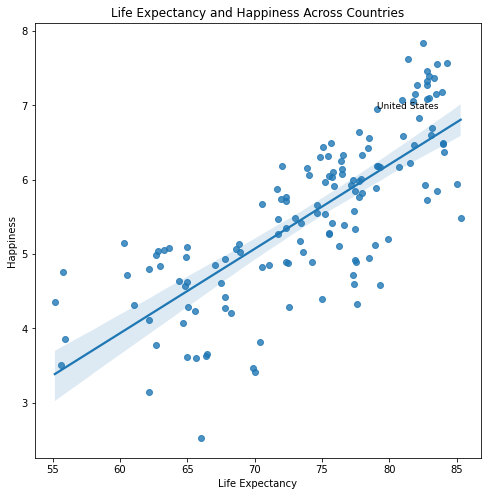

In [46]:
#plot happiness versus life expectancy, suppress text output with semicolon at ends of lines
g = sns.regplot(x = "both", y = "happiness2021", data = df);
g.figure.set_size_inches(8, 8);
g.annotate('United States', fontsize=9, xy = (x_point, y_point));
g.set(xlabel='Life Expectancy', ylabel='Happiness', title = 'Life Expectancy and Happiness Across Countries');

Finally, I perform linear regression on this data.

In [47]:
#perform linear regression
model = LinearRegression()
X = np.array(df["both"]).reshape(-1,1)
y = np.array(df["happiness2021"])
model.fit(X,y)
Y_pred = model.predict(X)

In [48]:
#calculate metrics
mse = mean_squared_error(y, Y_pred)
r2 = r2_score(y, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.4843381043152616
R-Squared: 0.5847952659416713


The mean squared error for this data set is high and the $R^2$ is somewhat low, especially compared to what I thought it would be. There is some association between happiness and life expectancy, but the relationship is not as strong as expected.